In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
df = pd.read_csv('/content/drive/MyDrive/4.1/PRML Lab/data_k_mean.txt', header = None, sep = ' ',names = ['A', 'B'])
df

,A,B
0,-7.87157,-4.86573
1,-4.76661,-6.87944
2,-6.67986,-5.83080
3,-8.93021,-4.15571
4,-7.91375,-4.22840
...,...,...
2995,-8.06037,-4.84080
2996,7.47328,0.37321
2997,6.91832,-0.32132
2998,-8.23828,-4.00405


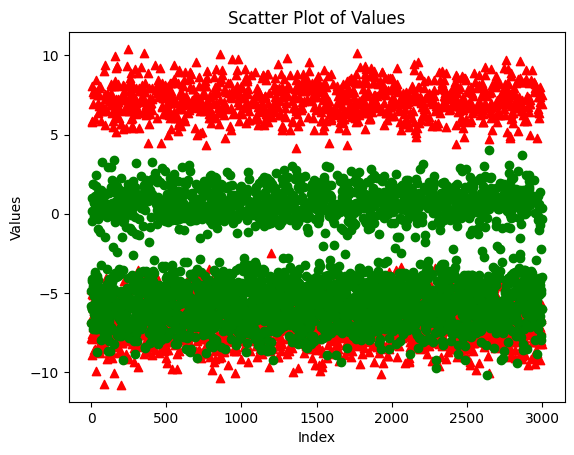

In [19]:
plt.scatter(df.index, df['A'], color='red', marker='^')
plt.scatter(df.index, df['B'], color= 'green', marker='o')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot of Values')

plt.show()

In [20]:
c1 = df.iloc[200, :].values
c2 = df.iloc[500, :].values
c1, c2

(array([5.67849, 2.28385]), array([-9.11147, -5.0321 ]))

In [21]:
while True:
  df['Distance from C1'] = (df['A'] - c1[0])**2 + (df['B'] - c1[1])**2
  df['Distance from C2'] = (df['A'] - c2[0])**2 + (df['B'] - c2[1])**2
  df['cluster'] = df[['Distance from C1', 'Distance from C2']].apply(lambda x: 1 if x[0]<x[1] else 2,  axis = 1)
  new_c1 = df[df['cluster'] == 1][['A', 'B']].mean().values
  new_c2 = df[df['cluster'] == 2][['A', 'B']].mean().values
  if (new_c1==c1).all() and (new_c2==c2).all():
    break
  c1 = new_c1
  c2 = new_c2


print(df)

            A        B  Distance from C1  Distance from C2  cluster
0    -7.87157 -4.86573        259.603029          1.843153        2
1    -4.76661 -6.87944        202.338151          5.546806        2
2    -6.67986 -5.83080        236.890186          0.030922        2
3    -8.93021 -4.15571        285.157204          6.914930        2
4    -7.91375 -4.22840        254.084878          3.430061        2
...       ...      ...               ...               ...      ...
2995 -8.06037 -4.84080        265.055635          2.320228        2
2996  7.47328  0.37321          0.232223        241.352193        1
2997  6.91832 -0.32132          1.307603        217.816368        1
2998 -8.23828 -4.00405        261.813925          4.967172        2
2999 -5.75112 -5.99531        214.140008          1.211622        2

[3000 rows x 5 columns]


<ipython-input-21-42d526abcf42>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['cluster'] = df[['Distance from C1', 'Distance from C2']].apply(lambda x: 1 if x[0]<x[1] else 2,  axis = 1)
<ipython-input-21-42d526abcf42>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['cluster'] = df[['Distance from C1', 'Distance from C2']].apply(lambda x: 1 if x[0]<x[1] else 2,  axis = 1)


<ipython-input-24-a4fc637338e0>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


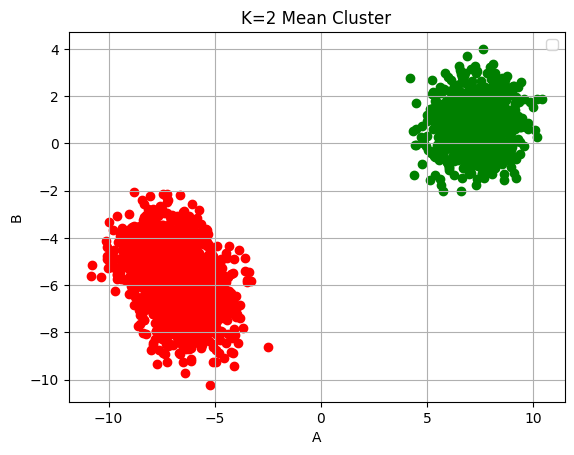

In [24]:
plt.scatter(df[df['cluster'] == 1]['A'], df[df['cluster'] == 1]['B'], color = 'green', marker='o')
plt.scatter(df[df['cluster'] == 2]['A'], df[df['cluster'] == 2]['B'], color = 'red', marker='o')

plt.title("K=2 Mean Cluster")
plt.xlabel("A")
plt.ylabel("B")
plt.legend()
plt.grid(True)
plt.show()

